# Data Distribution

**Description**: Plot the distribution of datasets

**Inputs**:

**Outputs**:

## Notebook Setup

### Libraries

In [7]:
import pandas as pd
from rich import traceback
from rich.progress import Progress
import fancyPlots
import fancyData

In [8]:
traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x1105e6ab0>>

### Configurations

In [9]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

## Import Data

In [10]:
hex_path = config["DEFAULT"]["hex_path"]
df = fancyData.load_and_concat_csv(hex_path)

In [11]:
df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,1684590721.864466,d2:6b:aa:b5:fb:ed,1,1,2d001bff00000000000000000000000000000000000000...,0000080000000040000020,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,135,iPhone12Pro_C
1,1684590721.884716,d2:6b:aa:b5:fb:ed,1,1,2d001bff00000000000000000000000000000000000000...,0000080000000040000020,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,135,iPhone12Pro_C
2,1684590721.910542,d2:6b:aa:b5:fb:ed,6,6,2d001bff00000000000000000000000000000000000000...,0000080000000040000020,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,135,iPhone12Pro_C
3,1684590721.930789,d2:6b:aa:b5:fb:ed,6,6,2d001bff00000000000000000000000000000000000000...,0000080000000040000020,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,135,iPhone12Pro_C
4,1684590721.968746,d2:6b:aa:b5:fb:ed,11,11,2d001bff00000000000000000000000000000000000000...,0000080000000040000020,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,135,iPhone12Pro_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76699,1623847860.708628,ec:9b:f3:75:8e:40,11,9,631117ffff000000000000000000000000000000000000...,0000088001400040,506f9a1010,NaN,02040b16,0c1218243048606c,NaN,NaN,162,SamsungS6_H
76700,1623847860.732495,ec:9b:f3:75:8e:40,11,10,631117ffff000000000000000000000000000000000000...,0000088001400040,506f9a1010,NaN,02040b16,0c1218243048606c,NaN,NaN,162,SamsungS6_H
76701,1623847860.752909,ec:9b:f3:75:8e:40,11,10,631117ffff000000000000000000000000000000000000...,0000088001400040,506f9a1010,NaN,02040b16,0c1218243048606c,NaN,NaN,162,SamsungS6_H
76702,1623847860.776777,ec:9b:f3:75:8e:40,11,11,631117ffff000000000000000000000000000000000000...,0000088001400040,506f9a1010,NaN,02040b16,0c1218243048606c,NaN,NaN,162,SamsungS6_H


Remove unwanted noise

In [ ]:
df = df[df["mac"] != "00:0f:00:6a:68:8b"]

## Original Dataset

### Probe Distribution

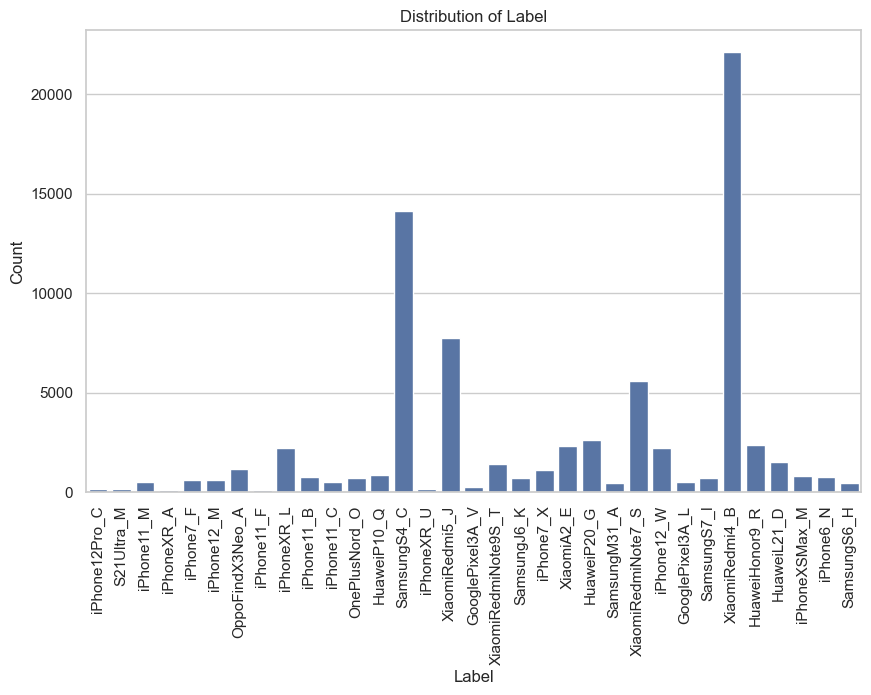

In [16]:
fancyPlots.plot_label_distribution(df, "Label", log_scale=False)

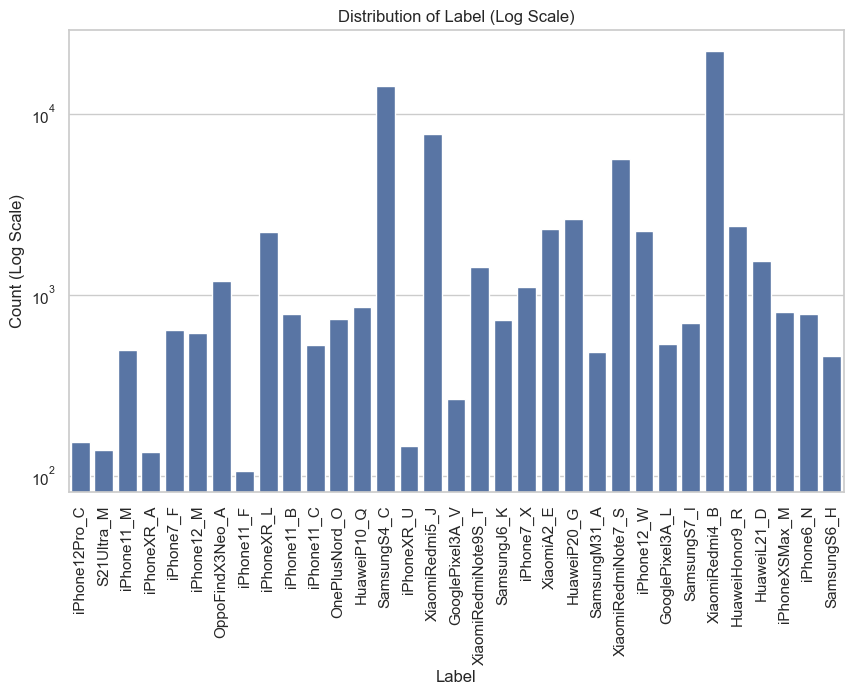

In [28]:
fancyPlots.plot_label_distribution(df, "Label", log_scale=True)

### Burst Distribution

Group columns by `MAC`

In [25]:
df_burst = df.groupby("MAC Address").first().reset_index()
df_burst

,MAC Address,Timestamp,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,00:0f:00:6a:68:8b,1625734447.078243,1,None,6e0102ff000000000000000000000000000000000e0000...,0100000000000000,0050f204104a000110103a00010010080002228c104800...,UNICAmente,960c121824304860,0c183060,None,None,76,SamsungJ6_K
1,00:be:3b:a2:a8:56,1622709082.796505,1,1,21011bffff000000000000000000000000000000000000...,00080f840140,00904c0408bf0c3270800ffaff0000faff0000,None,02040b16,0c1218243048606c,None,None,153,HuaweiP20_G
2,02:00:00:00:00:00,1621588794.305141,1,1,2d0117ff00000000000000000000000000000000000000...,010008000000004080,0050f208001100,None,02040b160c121824,3048606c,None,None,123,SamsungM31_A
3,02:00:00:00:3e:b2,1697118271.678568575,11,11,2d401bff00000000000000000000000000000000000000...,0000080400000040,None,None,82848b96,0c1218243048606c,None,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11_C
4,02:00:3a:5e:a1:f4,1697150242.345783865,11,10,2d401bff00000000000000000000000000000000000000...,0000080400000040,None,None,82848b96,0c1218243048606c,None,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,fe:f9:ac:47:0d:b7,1625073288.271257,11,11,2d401bff00000000000000000000000000000000000000...,0000080400000040,None,None,82848b96,0c1218243048606c,None,23010808180080203002000d009f08000000fdfffdff39...,131,iPhone12_W
4791,fe:f9:fc:fb:83:9e,1622475137.643837,6,6,214017ff00000000000000000000000000000000000000...,0400088400000040,0017f20a00010400000000,None,02040b16,0c1218243048606c,None,None,156,iPhone6_N
4792,fe:fc:07:34:10:69,1697118271.594447746,1,1,2d401bff00000000000000000000000000000000000000...,0000080400000040,None,None,82848b96,0c1218243048606c,None,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11_C
4793,fe:fc:aa:d1:89:d1,1625073354.225437,1,2,2d401bff00000000000000000000000000000000000000...,0000080400000040,None,None,82848b96,0c1218243048606c,None,23010808180080203002000d009f08000000fdfffdff39...,143,iPhone12_W


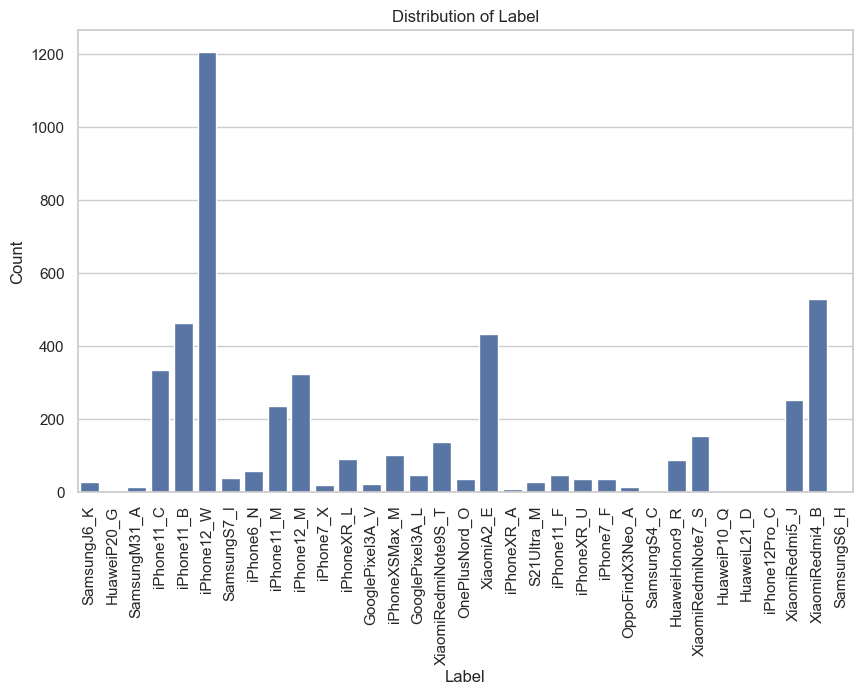

In [26]:
fancyPlots.plot_label_distribution(df_burst, "Label", log_scale=False)

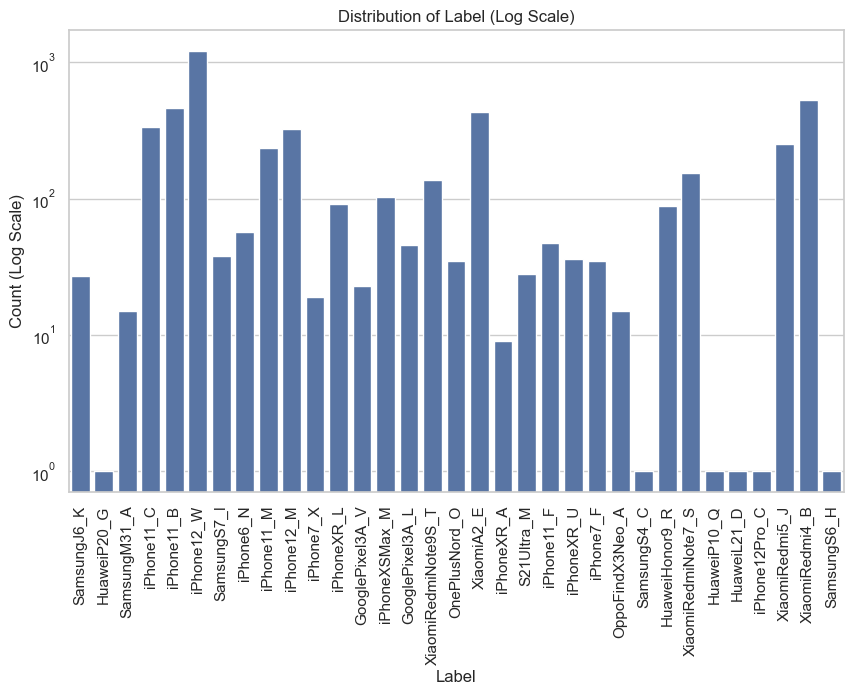

In [27]:
fancyPlots.plot_label_distribution(df_burst, "Label", log_scale=True)


In [43]:
# Count the number of probes for each label
probe_counts = df["Label"].value_counts().reset_index()
probe_counts.columns = ["Label", "Num_Probes"]

# Count the number of bursts for each label
burst_counts = df_burst["Label"].value_counts().reset_index()
burst_counts.columns = ["Label", "Num_Bursts"]

# Merge the two counts into a single dataframe
label_counts = pd.merge(probe_counts, burst_counts, on="Label", how="outer").fillna(0)
label_counts["Num_Probes"] = label_counts["Num_Probes"].astype(int)
label_counts["Num_Bursts"] = label_counts["Num_Bursts"].astype(int)

# Add a column for probes per burst
label_counts["Probes_Per_Burst"] = (
    label_counts["Num_Probes"] / label_counts["Num_Bursts"]
).round(2)

In [50]:
label_counts.sort_values(by="Num_Bursts", ascending=True)

,Label,Num_Probes,Num_Bursts,Probes_Per_Burst
3,HuaweiL21_D,1541,1,1541.00
4,HuaweiP10_Q,861,1,861.00
5,HuaweiP20_G,2628,1,2628.00
11,SamsungS4_C,14123,1,14123.00
12,SamsungS6_H,459,1,459.00
23,iPhone12Pro_C,154,1,154.00
29,iPhoneXR_A,136,9,15.11
10,SamsungM31_A,485,15,32.33
7,OppoFindX3Neo_A,1185,15,79.00
28,iPhone7_X,1097,19,57.74


In [45]:
label_counts.to_csv(
    f"{config['DEFAULT']['outputs_path']}/CSV/plot_generation/data_distribution.csv",
    index=False,
)

/var/folders/lm/412tcw7x3p38drhs1zgsz2x00000gn/T/ipykernel_88048/1082831809.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(label_counts['Label'], rotation=90)


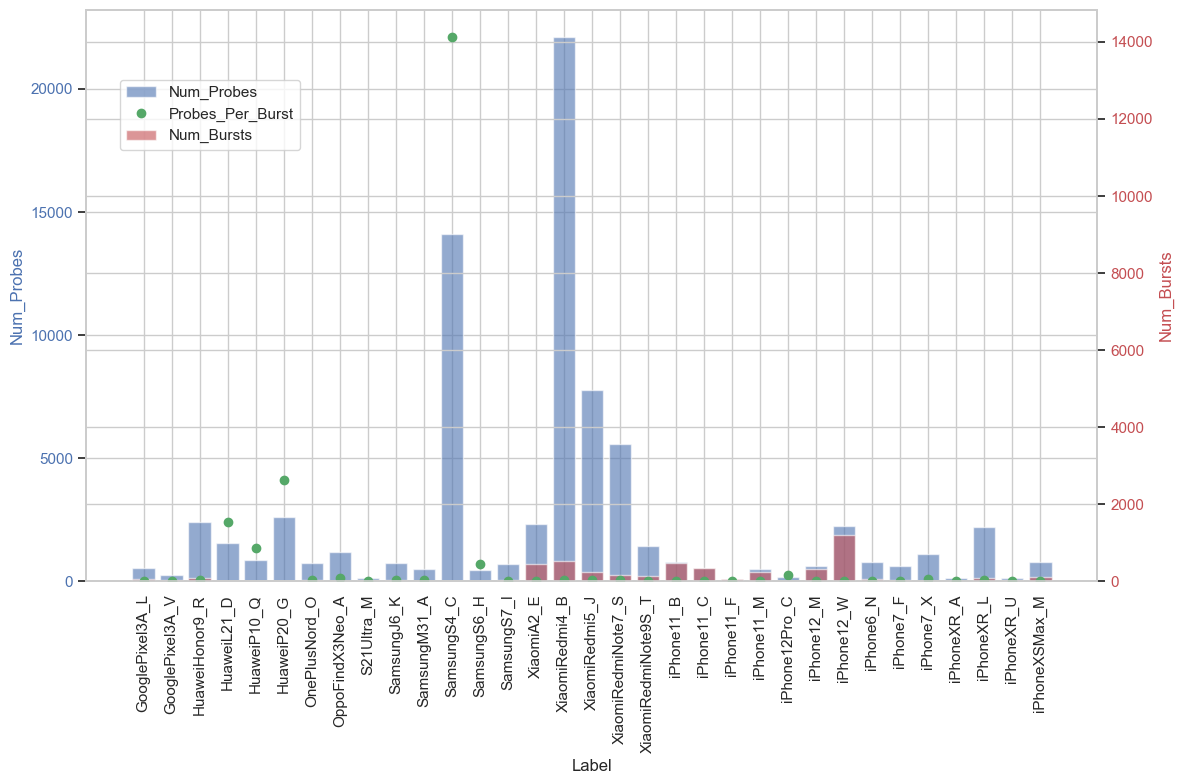

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Num_Probes on the left y-axis
ax1.bar(
    label_counts["Label"],
    label_counts["Num_Probes"],
    color="b",
    alpha=0.6,
    label="Num_Probes",
)
ax1.set_xlabel("Label")
ax1.set_ylabel("Num_Probes", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax1.set_xticklabels(label_counts["Label"], rotation=90)

# Create a second y-axis for Num_Bursts
ax2 = ax1.twinx()
ax2.bar(
    label_counts["Label"],
    label_counts["Num_Bursts"],
    color="r",
    alpha=0.6,
    label="Num_Bursts",
)
ax2.set_ylabel("Num_Bursts", color="r")
ax2.tick_params(axis="y", labelcolor="r")

# Plot Probes_Per_Burst as dots
ax2.plot(
    label_counts["Label"],
    label_counts["Probes_Per_Burst"],
    "go",
    label="Probes_Per_Burst",
)

# Add legends
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

/var/folders/lm/412tcw7x3p38drhs1zgsz2x00000gn/T/ipykernel_88048/2656347457.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(label_counts['Label'], rotation=90)


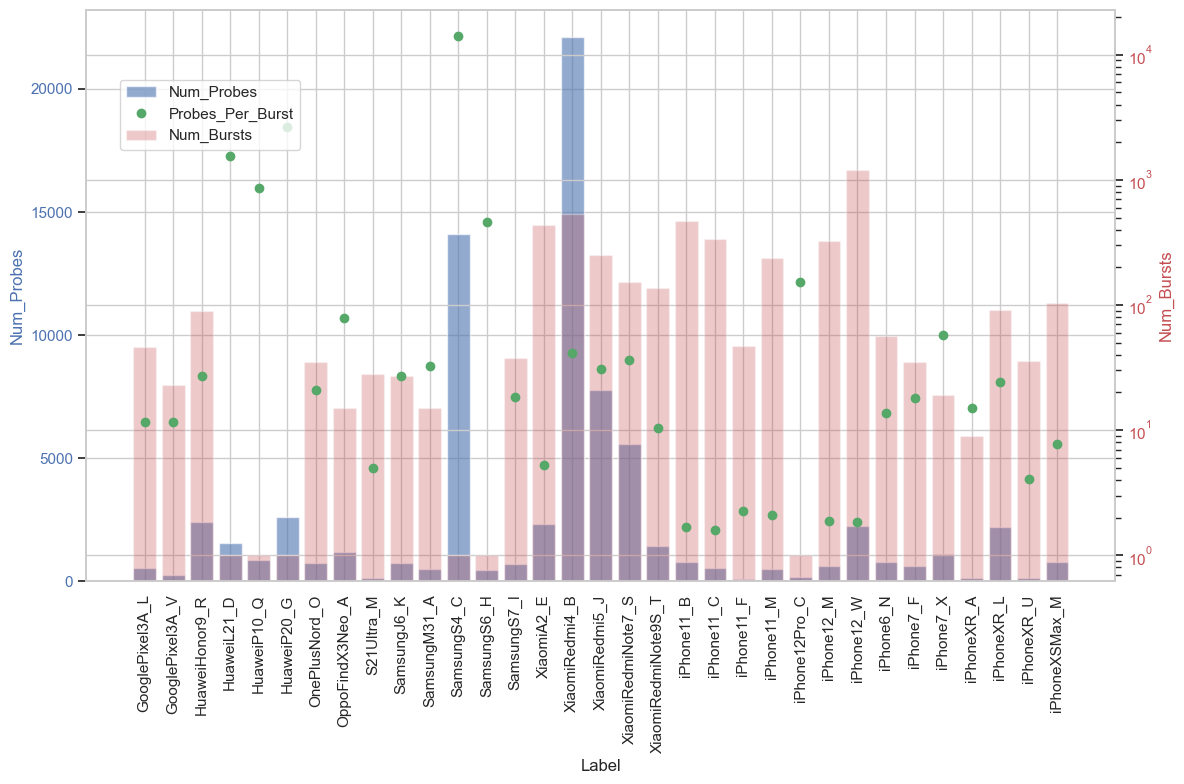

In [41]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Num_Probes on the left y-axis
ax1.bar(
    label_counts["Label"],
    label_counts["Num_Probes"],
    color="b",
    alpha=0.6,
    label="Num_Probes",
)
ax1.set_xlabel("Label")
ax1.set_ylabel("Num_Probes", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax1.set_xticklabels(label_counts["Label"], rotation=90)

# Create a second y-axis for Num_Bursts
ax2 = ax1.twinx()
ax2.bar(
    label_counts["Label"],
    label_counts["Num_Bursts"],
    color="r",
    alpha=0.3,
    label="Num_Bursts",
)
ax2.set_ylabel("Num_Bursts", color="r")
ax2.tick_params(axis="y", labelcolor="r")
ax2.set_yscale("log")  # Set y-axis to log scale

# Plot Probes_Per_Burst as dots
ax2.plot(
    label_counts["Label"],
    label_counts["Probes_Per_Burst"],
    "go",
    label="Probes_Per_Burst",
)

# Add legends
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()